# Probability Basics

In [54]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from scipy.stats import randint
from scipy.stats import norm

In [55]:
# Sample space (Rolling a fair six-sided die)
sample_space = {1, 2, 3, 4, 5, 6}

# Event A: Getting odd numbers
A = {1, 3, 5}

# probability P(A)
p_a = len(A) / len(sample_space)
print(f"P(A): {p_a}")

P(A): 0.5


### Quick Check

In [56]:
A = {2, 4, 6}   # all evens in Sample Space
B = {4, 6}      # evens > 3 in Sample Space

len_sample_space = len(sample_space)
p_A = len(A) / len_sample_space
p_B = len(B) / len_sample_space

print(f"p_A = {p_A}, len_sample_space = {len_sample_space}")
print(f"p_B = {p_B}, len_sample_space = {len_sample_space}")

p_A = 0.5, len_sample_space = 6
p_B = 0.3333333333333333, len_sample_space = 6


### Marginal Probability
* Probability of an event irrespective of outcome of other variables. Expressed as P(A) or P(B)

In [57]:
# Sample space with probabilities {outcome: prob} (must sum to 1)
sample_space_probs = {1: 0.1, 2: 0.2, 3: 0.1, 4: 0.2, 
                      5: 0.1, 6: 0.3}

# Event A - even numbers
A = { 2, 4, 6 }

p_A = 0
for evt, prob in sample_space_probs.items():
    if evt in A:
        p_A += prob

print(f"Marginal probability of event A -> {p_A}")

# Event B - odd numbers (optimized)
B = { 1, 3, 5 }
B_set = set(B)

p_B = 0
for evt, prob in sample_space_probs.items():
    if evt in B_set:
        p_B += prob

print(f"Marginal probability of event B -> {p_B}")
 

Marginal probability of event A -> 0.7
Marginal probability of event B -> 0.30000000000000004


### Joint Probability
* Events A and B occuring at the same time.
* Events A -> Number is even ; B -> Number greater than 3
* A and B are dependent (conditional)
  - P(A and B) = P(A|B) * P(B) - where P(A|B) is probability of A provided B has occured
* A and B are independent
  - P(A and B) = P(A) * P(B)

In [58]:
# Sample space as a set
sample_space = {1, 2, 3, 4, 5, 6}

# Events
A = {2, 4, 6}  # Even
B = {4, 5, 6}  # >3 Conditioning event / conditional sample space

p_B = len(B) / len(sample_space)
if p_B != 0:
    print(f"P(B) -> {p_B}")
    intersection = A & B
    print(f"intersection -> {intersection}")
    p_A_jnt_B = len(intersection) / len(sample_space)
    print(f"Joint P(A ∩ B): {p_A_jnt_B}")

P(B) -> 0.5
intersection -> {4, 6}
Joint P(A ∩ B): 0.3333333333333333


### Conditional Probability
* What is the probability of getting Even Number (event A) given that the number is greater than 3 (event B). Break into following
  - Roll the dice
  - Got a number > 3
  - Probabilty that it is Even
* P(A|B) = P(A intersection B) | P(B)

In [59]:
# sample space
sample_space = { 1, 2, 3, 4, 5, 6 }

# Event A - even number
A = { 2, 4, 6 }

# Event B - that number is > 3
B = { 4, 5, 6 }

A_intsct_B = A & B

print(f"A intersection B -> {A_intsct_B}")

# Conditional Probability P(A|B)
# given that number is > 3 (event B), probability of A
p_A_given_B = len(A_intsct_B) / len(A)
print(f"P(A given B) = {p_A_given_B}")


A intersection B -> {4, 6}
P(A given B) = 0.6666666666666666


### Random Variable
* X be random variable representing sum of the 2 die
* X can take values 2 through 12

In [60]:
# Create Sample space - throw of 2 die
sample_space = set([(x, y) for x in range(1, 7) 
                    for y in range(1, 7) ])

In [61]:
# Set of samples when X = 4 
event_set = set([(x, y) for x, y in sample_space if x + y == 4 ])

In [62]:
# Probability of event_set
p_X = len(event_set) / len(sample_space)
p_X

0.08333333333333333

In [63]:
# Random Variable X which assumes the sum of the 2 die
for sum in range(2, 13):
    event_set = set([(x, y) for x, y in sample_space if x + y == sum ])
    p_X = len(event_set) / len(sample_space)
    print(f"P(X = {sum}) -> {p_X}")


P(X = 2) -> 0.027777777777777776
P(X = 3) -> 0.05555555555555555
P(X = 4) -> 0.08333333333333333
P(X = 5) -> 0.1111111111111111
P(X = 6) -> 0.1388888888888889
P(X = 7) -> 0.16666666666666666
P(X = 8) -> 0.1388888888888889
P(X = 9) -> 0.1111111111111111
P(X = 10) -> 0.08333333333333333
P(X = 11) -> 0.05555555555555555
P(X = 12) -> 0.027777777777777776


### Random roll of 2 die

In [64]:
num_rolls=1000
d1 = randint.rvs(1, 7, size=num_rolls)
d2 = randint.rvs(1, 7, size=num_rolls)
outcomes = np.array(list(zip(d1.tolist(), d2.tolist())))
outcomes

array([[5, 6],
       [1, 1],
       [1, 4],
       ...,
       [3, 3],
       [5, 4],
       [4, 5]], shape=(1000, 2))

#### Get the counts for each outcome (x, y)

In [65]:
# Slightly slower method - okay for small arrays
outcome_counts = Counter(map(tuple, outcomes.tolist()))
print(outcome_counts)

Counter({(1, 5): 40, (5, 4): 40, (4, 6): 35, (4, 5): 34, (4, 3): 33, (1, 4): 32, (1, 2): 32, (2, 1): 31, (2, 2): 31, (2, 3): 31, (5, 5): 31, (6, 6): 31, (6, 1): 29, (6, 4): 29, (2, 6): 29, (3, 4): 29, (3, 2): 29, (3, 3): 29, (5, 6): 28, (1, 6): 28, (3, 1): 27, (4, 1): 27, (1, 3): 27, (3, 5): 25, (2, 5): 25, (3, 6): 25, (6, 3): 24, (6, 5): 24, (5, 2): 23, (4, 2): 23, (1, 1): 22, (5, 1): 21, (2, 4): 21, (6, 2): 19, (4, 4): 18, (5, 3): 18})


In [66]:
# Faster method - suitablefor larger arrays
# Use return_counts=True to get the tally
unique_rows, counts = np.unique(outcomes, 
            axis=0, 
            return_counts=True)
outcome_counts = dict(zip(map(tuple, unique_rows.tolist()), 
                  counts.tolist()))

In [67]:
# Display the results
cell_enabled = False
if cell_enabled:
    print("Outcome Frequencies:")
    for outcome, count in outcome_counts.items():
        print(f"{outcome}: {count} times ({(count / num_rolls) * 100:.2f}%)")

* Get the keys (each tuple), values (count of each tuple) 

In [68]:
outcomes = list(outcome_counts.keys())
frequencies = list(outcome_counts.values())
print("list(outcome_counts.keys()):", outcomes)
print("list(outcome_counts.values()):", frequencies)

list(outcome_counts.keys()): [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6)]
list(outcome_counts.values()): [22, 32, 27, 32, 40, 28, 31, 31, 31, 21, 25, 29, 27, 29, 29, 29, 25, 25, 27, 23, 33, 18, 34, 35, 21, 23, 18, 40, 31, 28, 29, 19, 24, 29, 24, 31]


* Convert the tuple (x, y) to string format for labels

In [69]:
# Convert your (36, 2) array of pairs into a list of strings
outcome_labels = [str(tuple(row)) for row in outcomes]

#### Plot the frequency of occurence of Tuples

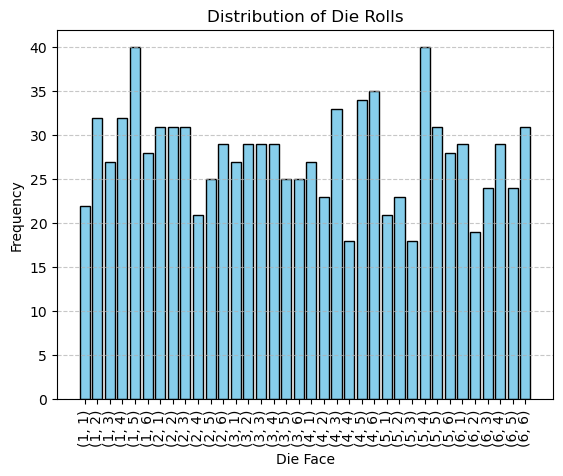

In [70]:
plt.bar(outcome_labels, frequencies, color='skyblue', edgecolor='black')
plt.title("Distribution of Die Rolls")
plt.xlabel("Die Face")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Continous Probability Distribution
* `Probability Density Function` (PDF)

* Generate Standard `Normal or Gaussian Distribution` data

In [71]:
# Generate emperical data 
mu, sigma = 0, 1
data = np.random.normal(mu, sigma, 1000)
np.set_printoptions(precision=3, suppress=True)
print(data[:50])

[ 0.383 -0.232  1.428  0.851  1.552  0.033 -0.195 -0.948  0.09   0.328
 -1.191  1.232 -0.862  0.334 -0.925  0.957 -0.94  -2.365 -0.593 -0.128
  1.471  2.366 -0.101  2.133  1.244  0.717 -0.955 -0.235  1.521  0.299
 -0.38   0.453 -0.94  -0.328 -0.745  0.746 -1.054 -0.896  0.213  0.886
 -0.078  0.489 -0.483  0.559  0.186  0.822  0.167 -1.905  0.624  1.041]


* Smooth the plot

In [72]:
# Normal Distribution, this is needed to be done to 
# plot a smooth "Probability Density Function"
x = np.linspace(min(data), max(data), 1000)
# print and check data
np.set_printoptions(precision=3, suppress=True)
print(x[:50])

[-3.097 -3.091 -3.085 -3.079 -3.073 -3.066 -3.06  -3.054 -3.048 -3.042
 -3.036 -3.03  -3.024 -3.018 -3.011 -3.005 -2.999 -2.993 -2.987 -2.981
 -2.975 -2.969 -2.963 -2.957 -2.95  -2.944 -2.938 -2.932 -2.926 -2.92
 -2.914 -2.908 -2.902 -2.895 -2.889 -2.883 -2.877 -2.871 -2.865 -2.859
 -2.853 -2.847 -2.84  -2.834 -2.828 -2.822 -2.816 -2.81  -2.804 -2.798]


* PDF or the `Normal or Gaussian Distribution`

In [73]:
pdf_normal = (1 / (np.sqrt(2 * np.pi) * sigma)) * \
            np.exp(-((x - mu) ** 2) / (2 * sigma ** 2))
# print and check data
np.set_printoptions(precision=3, suppress=True)
print(pdf_normal[:50])

[0.003 0.003 0.003 0.003 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004
 0.004 0.004 0.004 0.004 0.004 0.005 0.005 0.005 0.005 0.005 0.005 0.005
 0.005 0.005 0.005 0.005 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006
 0.006 0.006 0.007 0.007 0.007 0.007 0.007 0.007 0.007 0.007 0.008 0.008
 0.008 0.008]


* Plot the `PDF` for the `Gaussian Distribution`

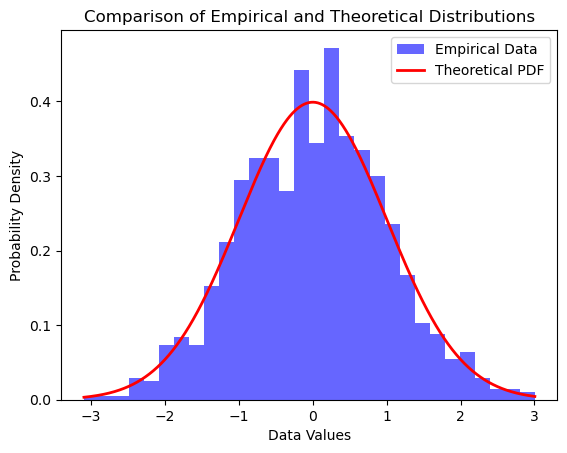

In [74]:
# Calculate empirical distribution (Histogram with density)
plt.hist(data, bins=30, density=True, alpha=0.6, color='blue', label='Empirical Data')

# Plot the theoretical PDF
plt.plot(x, pdf_normal, 'r', linewidth=2, label='Theoretical PDF')

# Visulaization
plt.title('Comparison of Empirical and Theoretical Distributions')
plt.xlabel('Data Values')
plt.ylabel('Probability Density')
plt.legend()

# Show the plot
plt.show()

## PDF with `scipy.stats` Functions

In [75]:
# Common x-range
x = np.linspace(-10, 20, 1000)

# (mu, sigma, color)
distributions = [
    (0, 1, 'blue'),      # Standard normal
    (5, 2, 'green'),     # Mean shifted
    (0, 0.5, 'red'),     # Smaller variance
    (-3, 1.5, 'orange')  # Negative mean
]

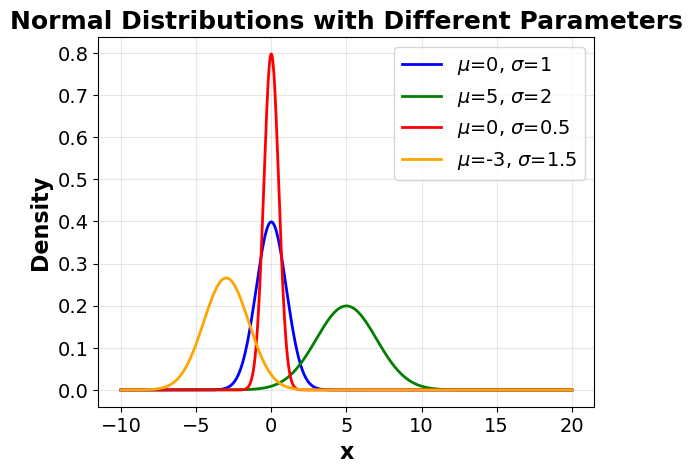

In [76]:
# Plot styling (once)
for mu, sigma, color in distributions:
    y = norm.pdf(x, mu, sigma)
    plt.plot(
        x, y,
        color=color,
        lw=2,
        label=rf"$\mu$={mu}, $\sigma$={sigma}"
    )

plt.title("Normal Distributions with Different Parameters",
          fontsize=18, fontweight='bold')
plt.xlabel("x", fontsize=16, fontweight='bold')
plt.ylabel("Density", fontsize=16, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.grid(alpha=0.3)

plt.show()